# The CIFAR-10 Dataset

**[About Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)**

# 1. Data Processing

## 1.1 Import Libraries

In [1]:
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

## 1.2 Load Dataset

In [2]:
'''
0: airplane 
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


- จะเห็นว่า training dataset มีจำนวน 50,000 ภาพ แต่ละภาพมีขนาด 32x32 และเป็นภาพสีซึ่งประกอบด้วยข้อมูล 3 ชุดได้แก่ R (red-แดง), G (green-เขียว), B (blue-น้ำเงิน)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
X_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [9]:
y_test[0]

array([3], dtype=uint8)

## 1.3 Preprocess Input

In [10]:
X_train.max()

255

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [104]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## 1.4 Preprocess Output

In [14]:
y_train_cat = to_categorical(y = y_train, num_classes = 10)
y_test_cat = to_categorical(y = y_test, num_classes = 10)

In [106]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [109]:
y_test_cat[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 1.5 Display images data before trainning

In [15]:
'''
0: airplane 
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

'\n0: airplane \n1: automobile\n2: bird\n3: cat\n4: deer\n5: dog\n6: frog\n7: horse\n8: ship\n9: truck\n'

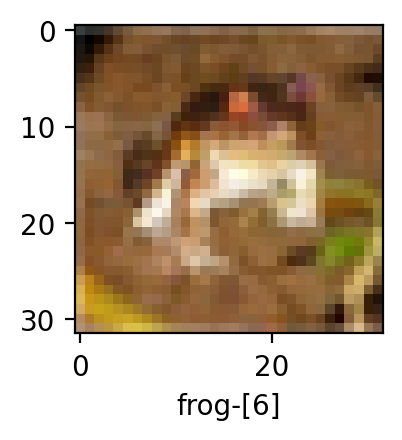

In [16]:
plt.style.use('default')
plt.figure(figsize = (2, 2))
plt.imshow(X_train[0])
plt.xlabel(label_names[int(y_train[0])] + '-' + str(y_train[0])) ;

https://www.youtube.com/watch?v=Wua3ro5vfTw

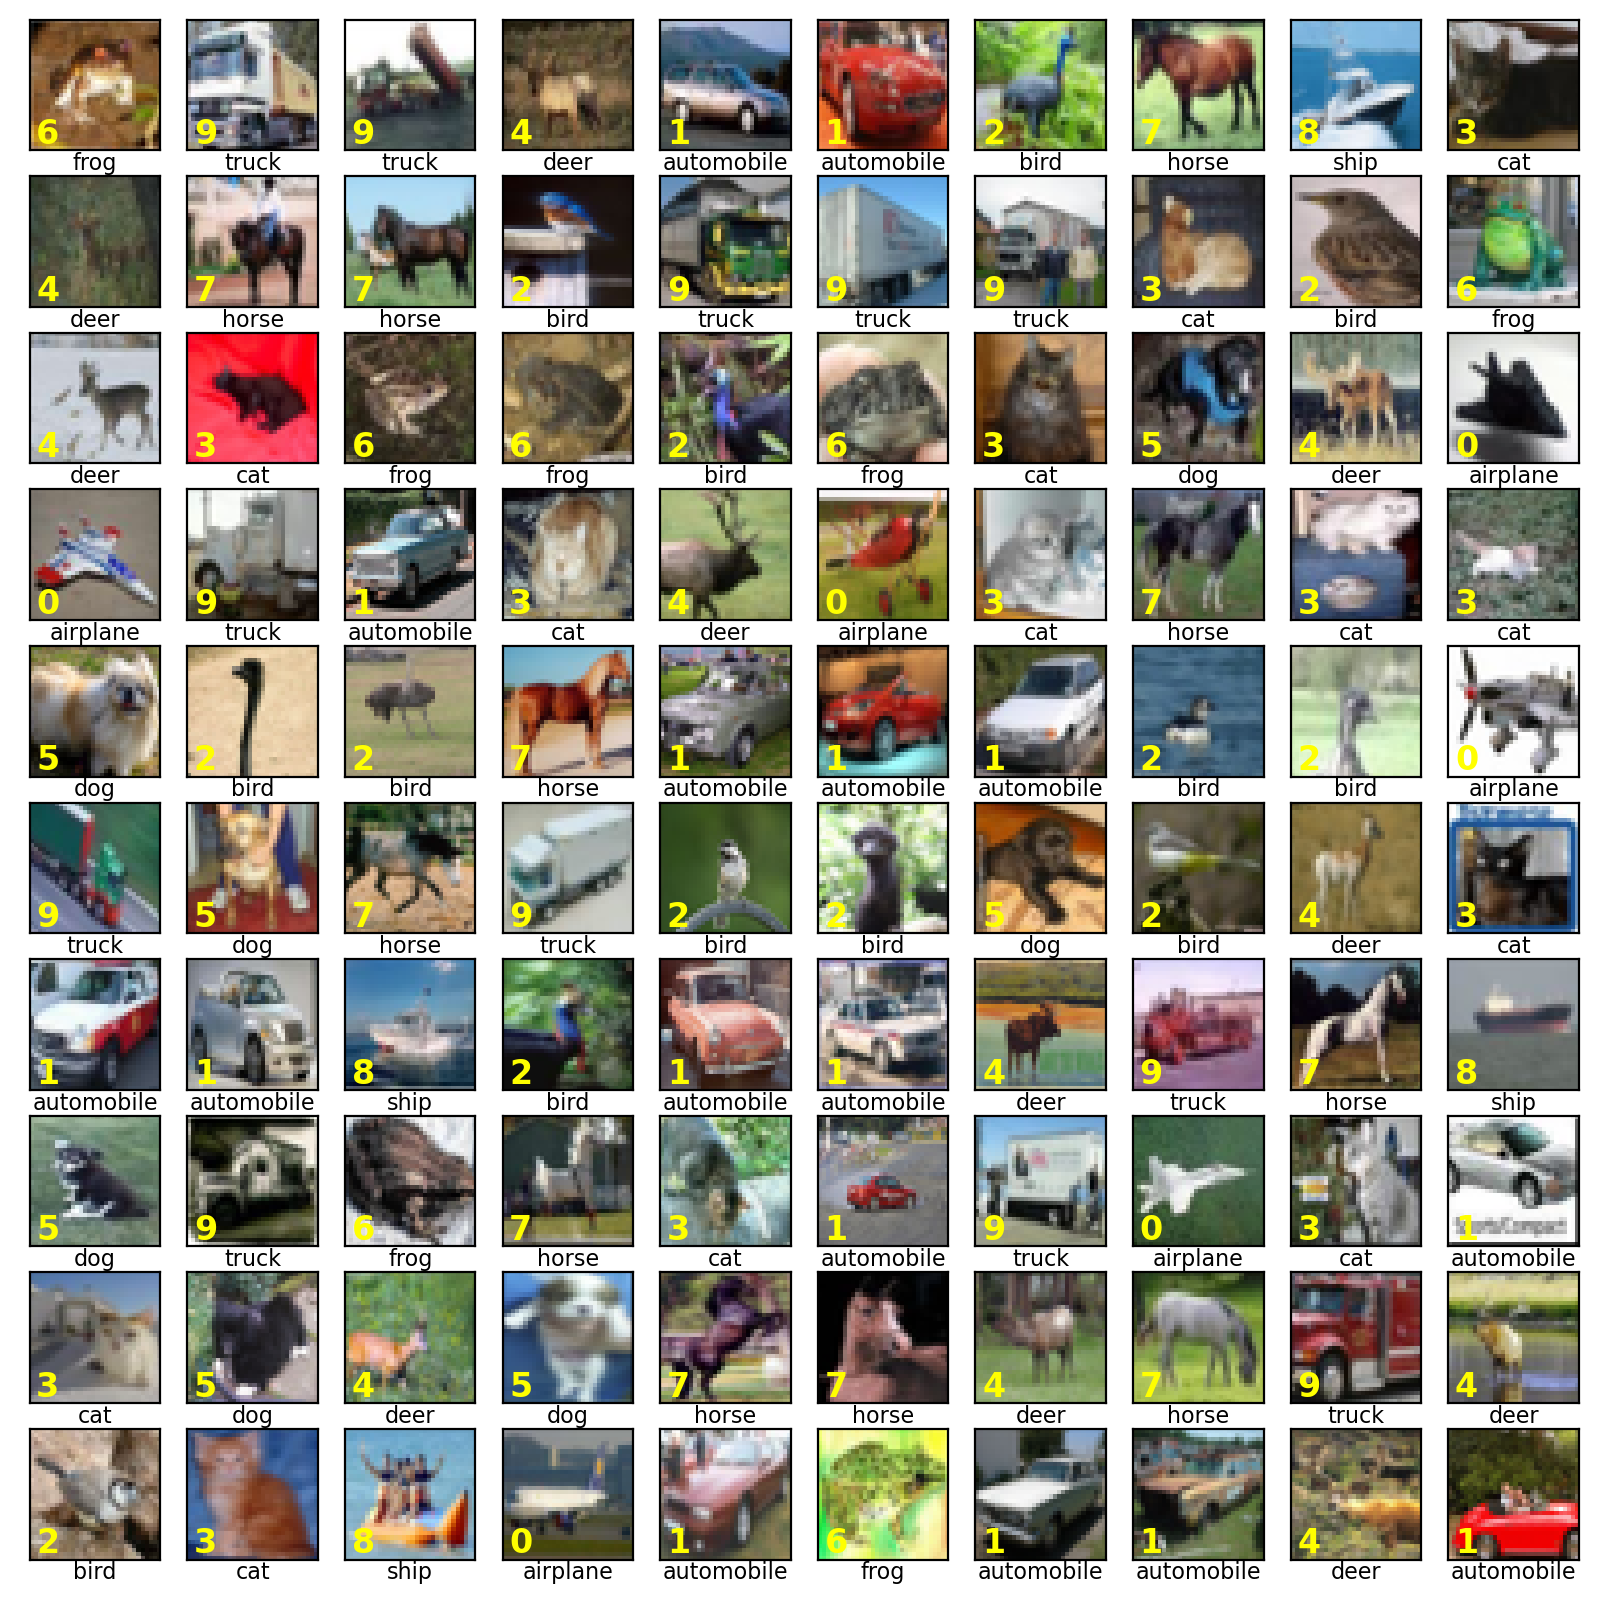

In [17]:
fig, ax = plt.subplots(nrows = 10, 
                       ncols = 10, 
                       figsize = (10, 10), 
                       subplot_kw = {'xticks': [], 'yticks' : []},
                       gridspec_kw = dict(hspace = 0.2, wspace = 0.2))

for i, axi in enumerate(ax.flat) :
    axi.imshow(X_train[i])
    axi.text(0.05, 
             0.05, 
             str(int(y_train[i])), 
             transform = axi.transAxes, 
             color = 'yellow',
             fontsize = 12,
             fontweight = 'bold')
    axi.set_xlabel(label_names[int(y_train[i])], 
                   fontsize = 8, 
                   labelpad = -3)

# 2. Model Creation

## 2.1 Convolutional Neural Networks Model

In [18]:
'''

ระยะเวลาในการรันโมเดลจะเร็วกว่าโมเดลข้างล่าง (ขึ้นอยู่กับความแรงของคอมพิวเตอร์)

Test loss: 0.85
Test accuracy: 0.71

'''

# # Create Sequential Model
# cnn_model = Sequential()
# 
# ### Feature Extraction เป็นส่วนที่มีหน้าที่ในการสกัด Feature ของภาพ ###
# # Layer 1: Convolutional Layer 
# cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
# cnn_model.add(MaxPool2D(pool_size = (2, 2)))
# cnn_model.add(Dropout(0.2))
# 
# # Layer 2: Convolutional Layer
# cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
# cnn_model.add(MaxPool2D(pool_size = (2, 2)))
# cnn_model.add(Dropout(0.2))
# 
# ### Image Classification เป็นส่วนที่มีหน้าที่ในการแยกประเภทภาพ ###
# # Layer 3: Flatten Layer
# cnn_model.add(Flatten())
# 
# # Layer 4: Dense layer or Fully connected Layer (Hidden Layer)
# cnn_model.add(Dense(256, activation = 'relu'))
# cnn_model.add(Dropout(0.2))
# 
# # Layer 5: Dense Layer (Output Layer)
# cnn_model.add(Dense(10, activation = 'softmax')) # 10 Feature
# 
# cnn_model.summary()

'\n\nระยะเวลาในการรันโมเดลจะเร็วกว่าโมเดลข้างล่าง (ขึ้นอยู่กับความแรงของคอมพิวเตอร์)\n\nTest loss: 0.85\nTest accuracy: 0.71\n\n'

In [19]:
# Create Sequential Model
cnn_model = Sequential()

### Feature Extraction เป็นส่วนที่มีหน้าที่ในการสกัด Feature ของภาพ ###
# Layer 1: Convolutional Layer 
cnn_model.add(Conv2D(filters = 50, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))

# Layer 2: Convolutional Layer
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPool2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))

# Layer 3: Convolutional Layer
cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPool2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))

# Layer 4: Convolutional Layer
cnn_model.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPool2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))

# Layer 5: Convolutional Layer
cnn_model.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPool2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))

### Image Classification เป็นส่วนที่มีหน้าที่ในการแยกประเภทภาพ ###
# Layer 6: Flatten Layer
cnn_model.add(Flatten()) # แปลงข้อมูล output ที่มีหลายมิติ ให้เป็น 1 มิติ

# Layer 7: Dense layer or Fully connected Layer (Hidden Layer)
cnn_model.add(Dense(500, activation = 'relu'))
cnn_model.add(Dropout(0.2))

# Layer 8: Dense Layer (Hidden Layer)
cnn_model.add(Dense(250, activation = 'relu'))
cnn_model.add(Dropout(0.2))

# Layer 9: Dense Layer (Output Layer)
cnn_model.add(Dense(10, activation = 'softmax')) # 10 Feature

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        28864     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

https://www.nectec.or.th/news/news-public-document/machine-learning-manufact-1.html

- สังเกต Layer สุดท้าย คือ Dense(10, activation='softmax') ใช้ Softmax activation function ซึ่งทำให้โมเดลสามารถ Output แบบ Multiclass ได้ โดยเราต้องกำหนดจำนวน Neuron เท่ากับจำนวน Class ที่เป็นไปได้ ซึ่งก็คือ 10 นั่นเอง
- Dense คือ เชื่อมแต่ละ node ทุกอัน ของชั้น layer หนึ่งไปอีก layer หนึ่ง หรือ FC (fully connected)
- Convolution Layer (ConvLayer) คือ Layer ที่อยู่แรก ๆ ของโมเดล CNN, ConvLayer ทำหน้าที่สกัดเอา Feature สำคัญ จากรูปภาพ, ConvLayer มีความพิเศษตรงที่ คงความสัมพันธ์ของ Pixel ที่อยู่บริเวณพื้นที่ใกล้เคียงกันเอาไว้ด้วย [Ref](https://www.bualabs.com/archives/2461/what-is-convolutional-neural-network-cnn-convnet-mnist-deep-learning-convnet-ep-1/)
- Padding คือ การขยายขอบของข้อมูล Input ออกทุกด้านเท่าๆ กัน [Ref](https://guopai.github.io/ml-blog19.html)

## 2.2 Model Compiling and Fitting

In [20]:
cnn_model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

In [21]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

cnn_history = cnn_model.fit(X_train, 
                            y_train_cat, 
                            epochs = 20,
                            validation_data = (X_test, y_test_cat),
                            callbacks = [early_stop])

Epoch 1/20
1563/1563 [==============================] - 378s 241ms/step - loss: 1.6131 - accuracy: 0.3988 - val_loss: 1.1874 - val_accuracy: 0.5737
Epoch 2/20
1563/1563 [==============================] - 377s 241ms/step - loss: 1.1494 - accuracy: 0.5913 - val_loss: 0.9765 - val_accuracy: 0.6523
Epoch 3/20
1563/1563 [==============================] - 376s 241ms/step - loss: 0.9852 - accuracy: 0.6542 - val_loss: 0.8361 - val_accuracy: 0.7071
Epoch 4/20
1563/1563 [==============================] - 372s 238ms/step - loss: 0.8766 - accuracy: 0.6959 - val_loss: 0.8260 - val_accuracy: 0.7133
Epoch 5/20
1563/1563 [==============================] - 368s 235ms/step - loss: 0.8197 - accuracy: 0.7167 - val_loss: 0.7399 - val_accuracy: 0.7487
Epoch 6/20
1563/1563 [==============================] - 370s 236ms/step - loss: 0.7680 - accuracy: 0.7331 - val_loss: 0.7598 - val_accuracy: 0.7394
Epoch 7/20
1563/1563 [==============================] - 369s 236ms/step - loss: 0.7288 - accuracy: 0.7468 - val_

# 3. Model Evaluation

## 3.1 Plot Evolution During Training

In [47]:
metrics = pd.DataFrame(cnn_history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.613102,0.39884,1.187399,0.5737
1,1.149392,0.59126,0.976453,0.6523
2,0.985231,0.65416,0.836124,0.7071
3,0.876572,0.69586,0.825975,0.7133
4,0.819679,0.71668,0.739893,0.7487
5,0.768027,0.73314,0.759773,0.7394
6,0.728753,0.74676,0.691510,0.7622
7,0.702314,0.75824,0.715321,0.7564
8,0.674204,0.76788,0.687157,0.7615
9,0.659842,0.77472,0.675193,0.7695


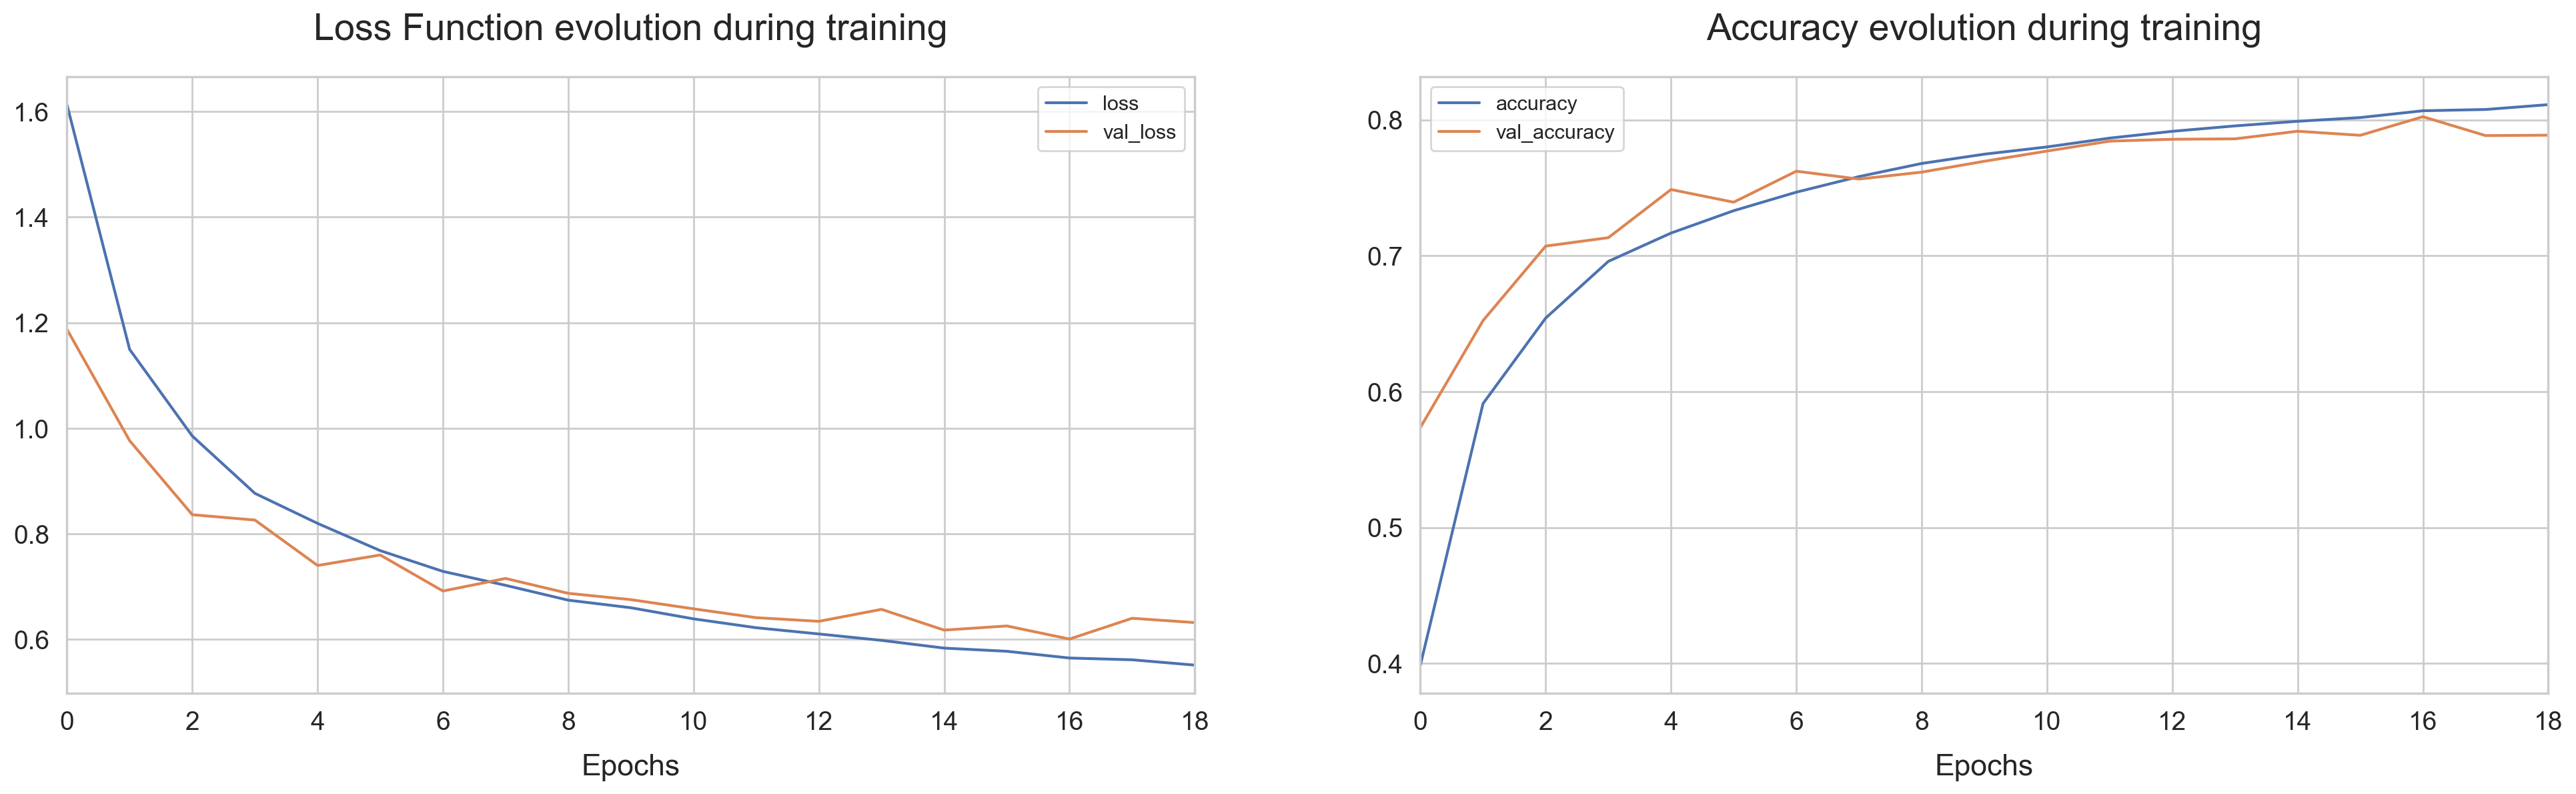

In [116]:
sns.set_style('whitegrid')
plt.figure(figsize = (24, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label = 'loss')
plt.plot(cnn_history.history['val_loss'], label = 'val_loss')
plt.title('Loss Function evolution during training', fontsize = 20, pad = 20)
plt.legend()
plt.xlabel('Epochs', fontsize = 16, labelpad = 10)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(0, 18)

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label = 'accuracy')
plt.plot(cnn_history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy evolution during training', fontsize = 20, pad = 20)
plt.legend() 
plt.xlabel('Epochs', fontsize = 16, labelpad = 10) 
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14) 
plt.xlim(0, 18) ;

plt.savefig('plot_evaluate.png', bbox_inches = 'tight', dpi = 400)

- กราฟระหว่างค่า loss ที่ได้จากชุดข้อมูล train กับ ชุดข้อมูล validation แสดงให้เห็นว่าในรอบการรันที่ 17 และ 18 ค่า loss ของชุดข้อมูล train ยังคงลดลง แต่ค่า loss ของชุดข้อมูล validation เริ่มเพิ่มขึ้น หากเรายัง train model ต่อไปก็อาจทำให้ model ของเราเกิด overfit ขึ้นได้
- สำหรับค่าความถูกต้องหรือ accuracy นั้นก็แสดงไปในทิศทางที่สอดคล้องกัน คือในรอบการ train ที่ 17 และ 18 แม้ว่าค่าความถูกต้องของชุดข้อมูล train จะเพิ่มขึ้น แต่เมื่อทดสอบกับชุดข้อมูล validation พบว่าค่าเริ่มลดลง การหยุด train model จึงช่วยให้ model ไม่เกิด overfit เกินไป
- ***ค่า loss และ accuracy ของชุดข้อมูล validation ยังไม่นิ่ง ต้องเพิ่มจำนวนรอบ epoch***

## 3.2 Evaluate CNN Model

In [49]:
 cnn_model.evaluate(X_train, y_train_cat)

1563/1563 [==============================] - 91s 58ms/step - loss: 0.3578 - accuracy: 0.8795


[0.35783612728118896, 0.8794999718666077]

In [50]:
score_cnn = cnn_model.evaluate(X_test, y_test_cat)
print(score_cnn)
print('_' * 100)
print(f'Test loss: {score_cnn[0]:.4f}')
print(f'Test accuracy: {score_cnn[1]:.4f}')

313/313 [==============================] - 17s 55ms/step - loss: 0.6317 - accuracy: 0.7887
[0.6317136883735657, 0.7886999845504761]
____________________________________________________________________________________________________
Test loss: 0.6317
Test accuracy: 0.7887


## 3.3 Prediction

In [25]:
# Binary Classification
# predictions = (cnn_model.predict(X_test) > 0.5).astype('int32')

In [26]:
# Multi-class Classification
# y_pred = np.argmax(cnn_model.predict(X_test), axis = 1)
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

313/313 [==============================] - 17s 53ms/step


In [27]:
y_pred[0]

3

In [28]:
y_test[0]

array([3], dtype=uint8)

In [29]:
y_test_cat[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 3.4 Classification Report

In [117]:
print(classification_report(y_test, y_pred, target_names = label_names))

              precision    recall  f1-score   support

    airplane       0.85      0.77      0.81      1000
  automobile       0.91      0.90      0.91      1000
        bird       0.72      0.68      0.70      1000
         cat       0.67      0.52      0.59      1000
        deer       0.69      0.83      0.75      1000
         dog       0.78      0.67      0.72      1000
        frog       0.69      0.92      0.79      1000
       horse       0.88      0.80      0.84      1000
        ship       0.86      0.91      0.89      1000
       truck       0.87      0.89      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



## 3.5 Confusion Matrix

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix 

array([[771,  12,  62,  18,  29,   1,  12,   6,  56,  33],
       [  7, 901,   0,   1,   2,   0,   8,   3,  25,  53],
       [ 39,   1, 678,  27, 102,  33,  93,  13,  11,   3],
       [ 16,   7,  65, 522,  78, 113, 135,  27,  18,  19],
       [ 12,   1,  28,  19, 830,   9,  77,  20,   2,   2],
       [  3,   3,  48, 122,  63, 665,  50,  29,   8,   9],
       [  2,   1,  18,  25,  22,   5, 917,   5,   4,   1],
       [  9,   1,  34,  30,  71,  22,  20, 801,   3,   9],
       [ 35,  11,   7,   5,   9,   2,   5,   3, 914,   9],
       [ 13,  51,   4,   6,   4,   1,   9,   5,  19, 888]], dtype=int64)

In [98]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

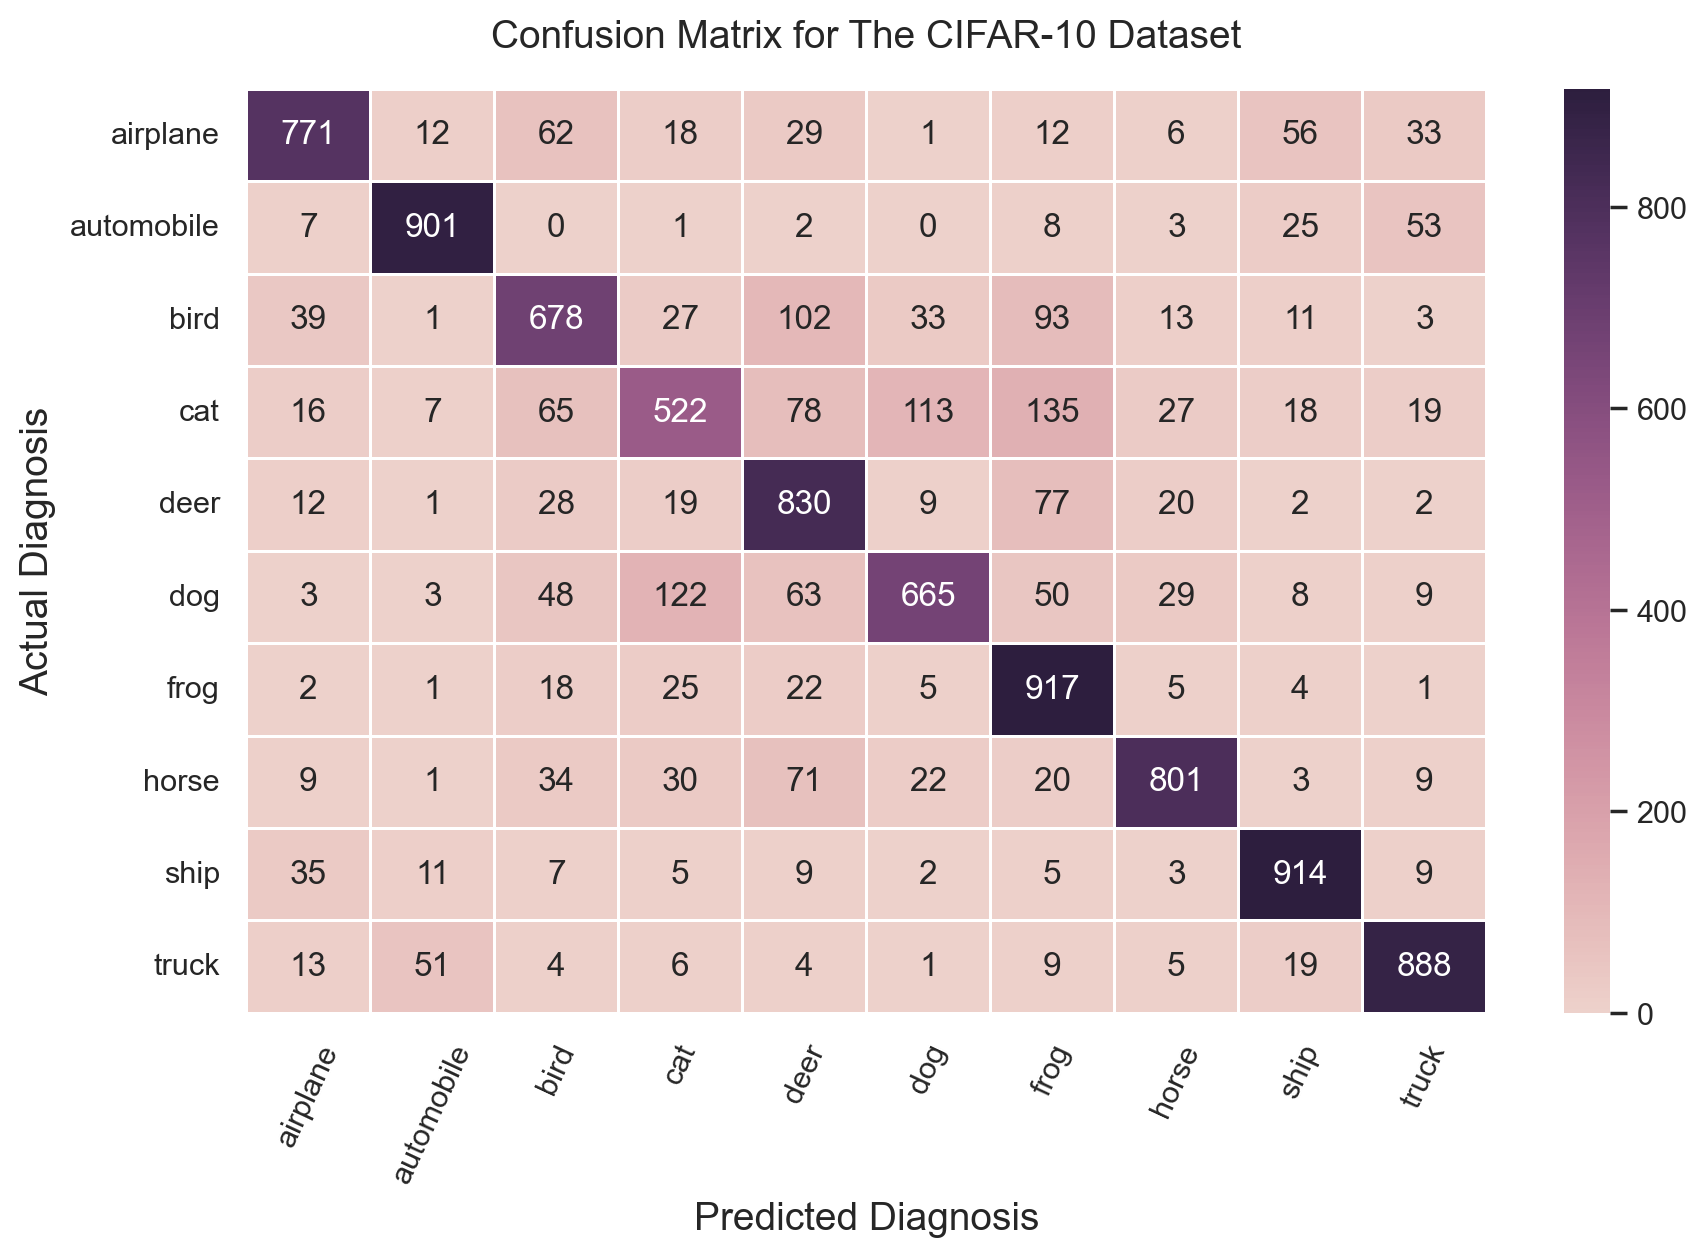

In [115]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize = (10, 6), dpi = 100)
# Scale up the size of all text
sns.set(font_scale = 1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(conf_matrix, 
                 annot = True, 
                 fmt = 'd', 
                 cmap = sns.cubehelix_palette(as_cmap = True), 
                 linewidths = 0.5) 

# set x-axis label and ticks
ax.set_xlabel('Predicted Diagnosis', fontsize = 14, labelpad = 5)
ax.xaxis.set_ticklabels(label_names, rotation = 65)

# set y-axis label and ticks
ax.set_ylabel('Actual Diagnosis', fontsize = 14, labelpad = 5)
ax.yaxis.set_ticklabels(label_names, rotation = 360)

# set plot title
ax.set_title('Confusion Matrix for The CIFAR-10 Dataset', fontsize = 14, pad = 15)

plt.savefig('confusion_matrix.png', bbox_inches = 'tight', dpi = 400)

In [33]:
#plt.figure(figsize=(8, 4))
#sns.set(font_scale = 0.8)
#sns.heatmap(conf_matrix , annot = True, cmap = 'YlGnBu', fmt = 'd');

# 4. การนำโมเดลไปใช้งาน

## 4.1 Display images data affter trainning & Prediction

In [34]:
'''
0: airplane 
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

'\n0: airplane \n1: automobile\n2: bird\n3: cat\n4: deer\n5: dog\n6: frog\n7: horse\n8: ship\n9: truck\n'

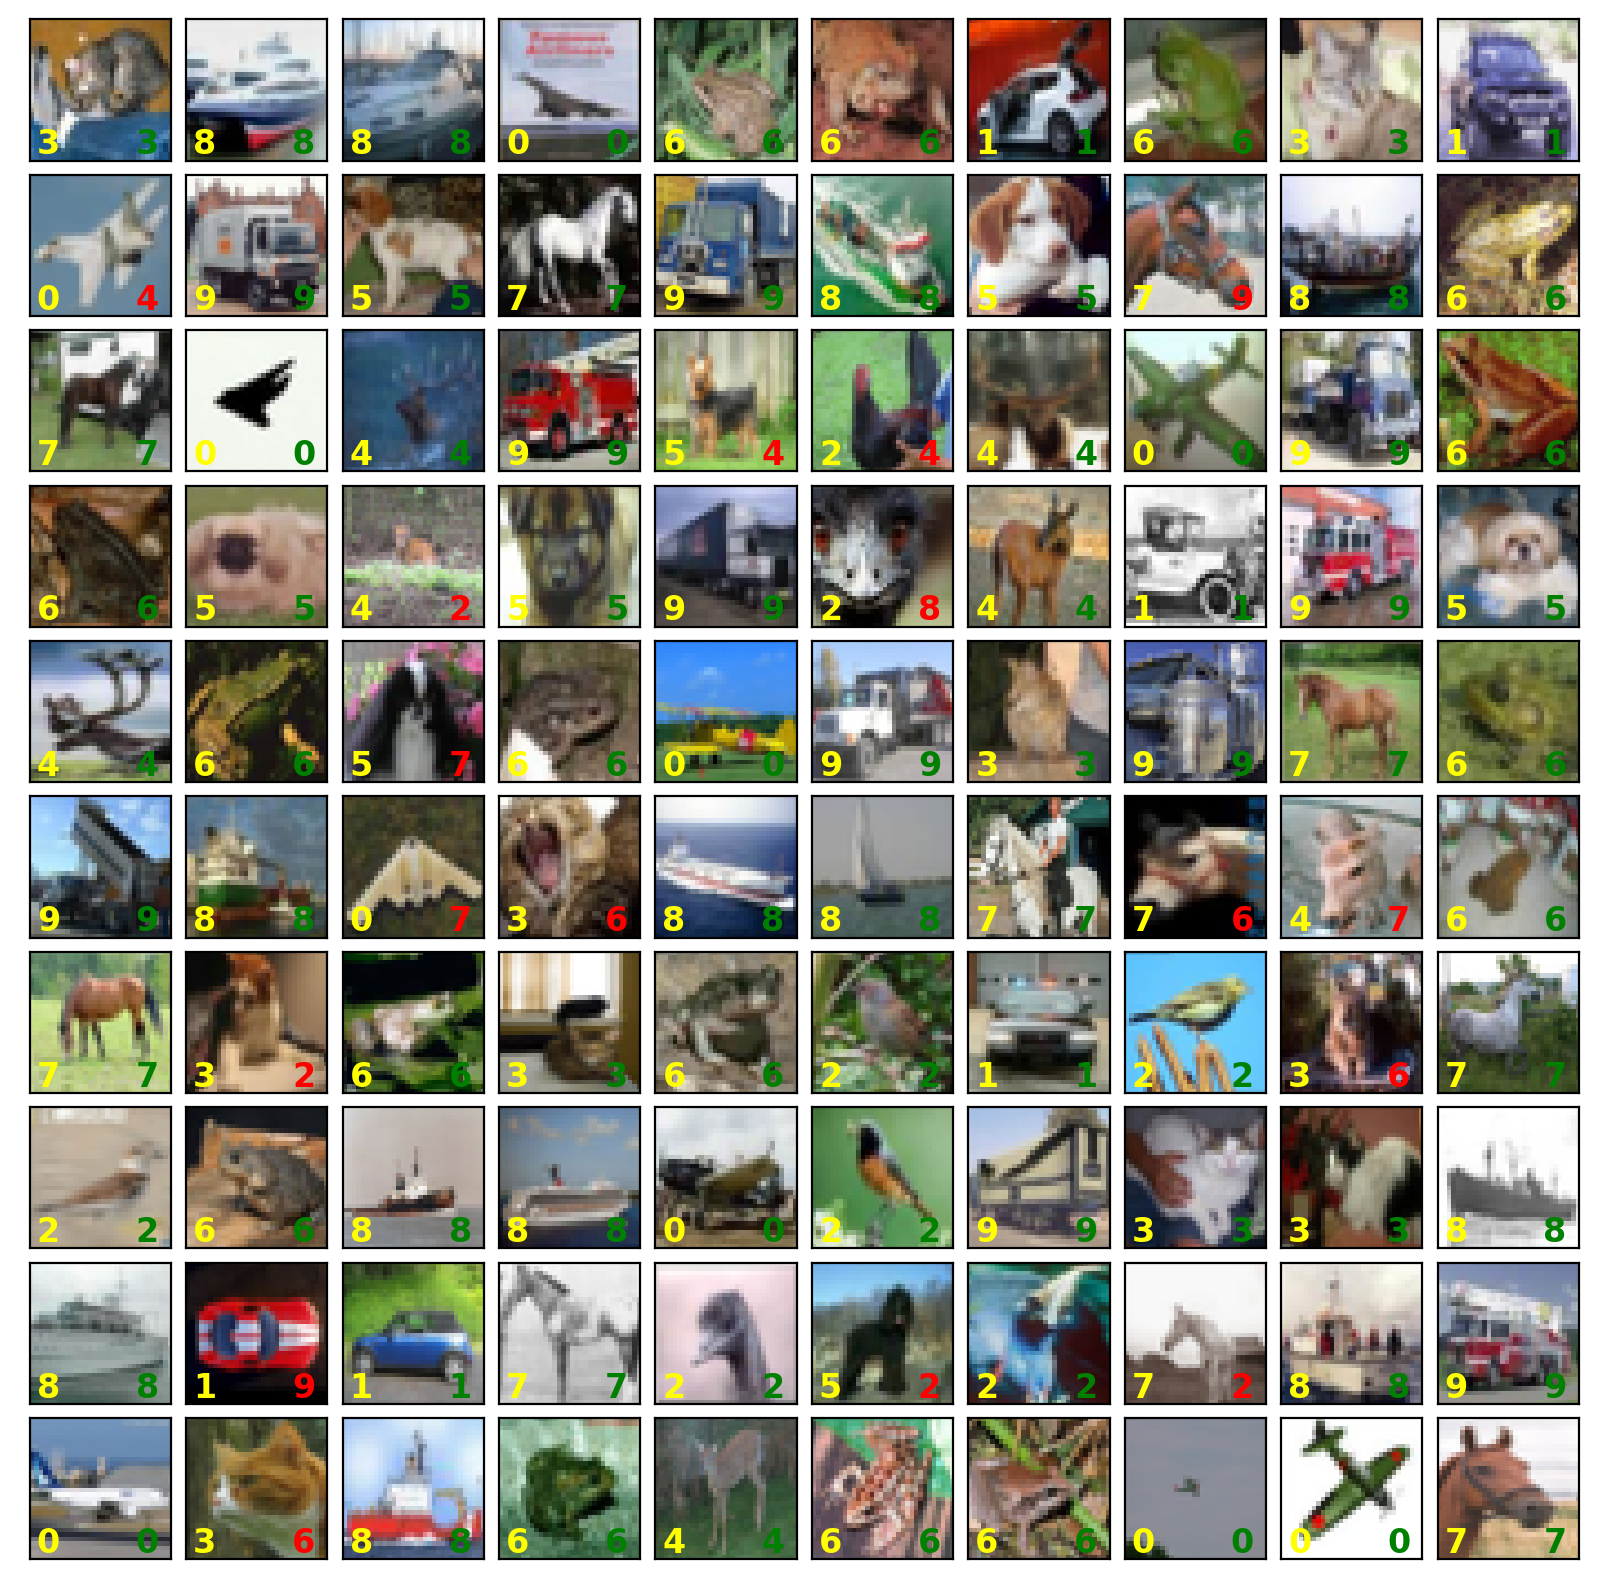

In [35]:
plt.style.use('default')

fig, ax = plt.subplots(nrows = 10, 
                       ncols = 10, 
                       figsize = (10, 10), 
                       subplot_kw = {'xticks': [], 'yticks' : []},
                       gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, axi in enumerate(ax.flat) :

# display test image dataset
    axi.imshow(X_test[i])

# display text test number image dataset 
    axi.text(0.05, 
             0.05, 
             str(int(y_test[i])), 
             transform = axi.transAxes, 
             color = 'yellow',
             fontsize = 12,
             fontweight = 'bold')
    
# display text prediction number image dataset 
    axi.text(0.75, 
             0.05, 
             str(int(y_pred[i])), 
             transform = axi.transAxes, 
             color = 'green' if y_pred[i] == y_test[i] else 'red',
             fontsize = 12,
             fontweight = 'bold')
    
plt.show()

In [36]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

label_names_pred = {    
                        0 : 'airplane',
                        1 : 'automobile',
                        2 : 'bird',
                        3 : 'cat',
                        4 : 'deer',
                        5 : 'dog',
                        6 : 'frog',
                        7 : 'horse',
                        8 : 'ship',
                        9 : 'truck'
                    } 

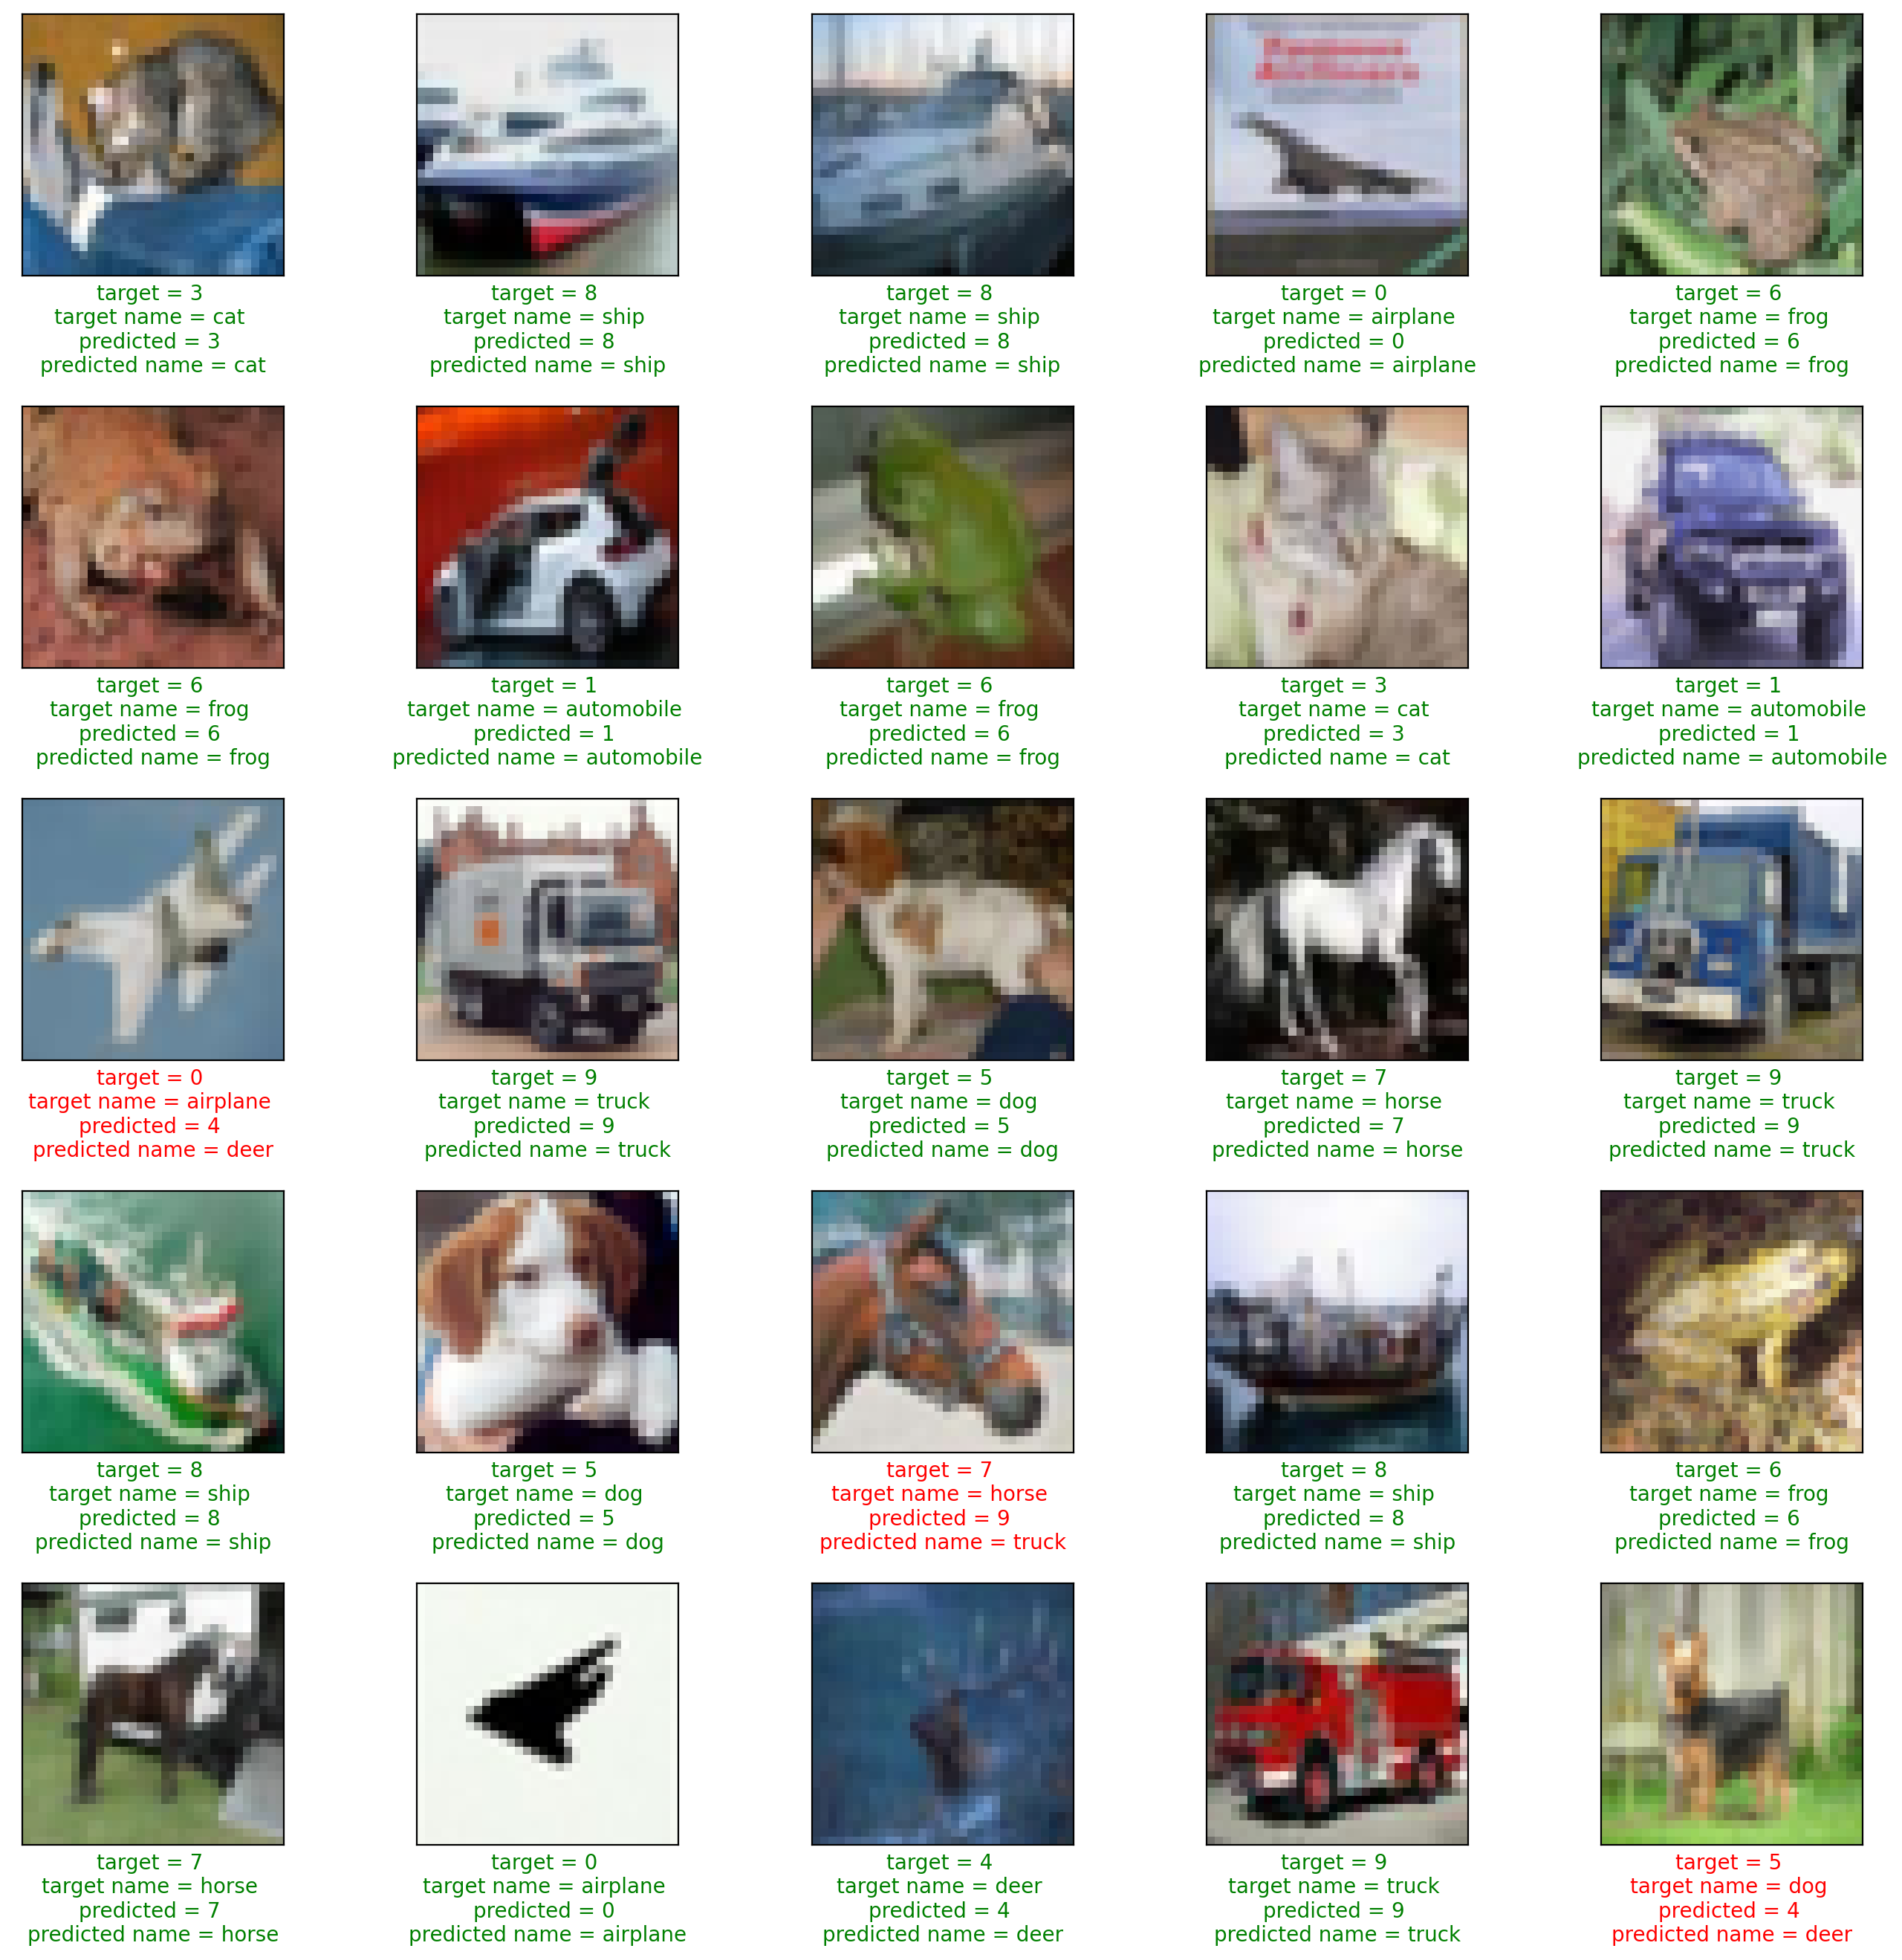

In [37]:
plt.style.use('default')

fig, ax = plt.subplots(nrows = 5, 
                       ncols = 5, 
                       figsize = (16, 16), 
                       subplot_kw = {'xticks': [], 'yticks' : []},
                       gridspec_kw = dict(hspace = 0.5, wspace = 0.5))

for i, axi in enumerate(ax.flat) :
    axi.imshow(X_test[i])
    axi.set_xlabel(f'target = {int(y_test[i])} \ntarget name = {label_names[int(y_test[i])]} \npredicted = {int(y_pred[i])} \npredicted name = {label_names_pred[y_pred[i]]}',
                   color = 'green' if y_pred[i] == y_test[i] else 'red',
                   fontsize = 10,
                   labelpad = 0) ;

Random Number: 4789


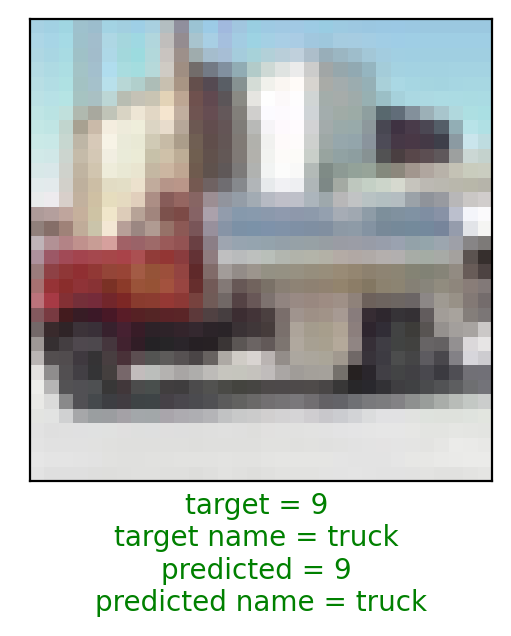

In [38]:
import random
pid = random.randrange(X_test.shape[0])

fig, ax = plt.subplots(figsize = (3, 3), 
                       subplot_kw = {'xticks': [], 'yticks' : []},
                       gridspec_kw = dict(hspace = 0.5, wspace = 0.5))

img = X_test[pid]
ax.imshow(img, interpolation='none')
ax.set_xlabel(f'target = {int(y_test[pid])} \ntarget name = {label_names[int(y_test[pid])]} \npredicted = {int(y_pred[pid])} \npredicted name = {label_names_pred[y_pred[pid]]}',
           color = 'green' if y_pred[pid] == y_test[pid] else 'red',
           fontsize = 10,
           labelpad = 0)
print(f'Random Number: {pid}')



# 5. Reference

Dataset & Guideline:

- https://medium.com/mlearning-ai/cifar-10-image-classification-linear-model-vs-cnn-e1596ec2be26
- https://medium.com/@app.kkloft/convolutional-neural-networks-cnn-%E0%B8%AA%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%87-model-%E0%B9%80%E0%B8%9E%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%97%E0%B8%B3-image-classification-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-tensorflow-58173661cfeb

Neural Network:
- https://discuss.tensorflow.org/t/sequential-object-has-no-attribute-predict-classes/10157/3
- https://www.bualabs.com/archives/2461/what-is-convolutional-neural-network-cnn-convnet-mnist-deep-learning-convnet-ep-1/
- https://guopai.github.io/ml-blog19.html
- https://medium.com/@amnouychokanant_n/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%97%E0%B8%B3-regularization-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%AA%E0%B8%A1%E0%B8%B1%E0%B8%A2%E0%B9%83%E0%B8%AB%E0%B8%A1%E0%B9%88-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B9%80%E0%B8%97%E0%B8%84%E0%B8%99%E0%B8%B4%E0%B8%84-augmentation-batch-normalization-%E0%B9%81%E0%B8%A5%E0%B8%B0-dropout-72ec1a54e06d
- https://medium.com/bigdataeng/%E0%B9%80%E0%B8%A3%E0%B8%B4%E0%B9%88%E0%B8%A1%E0%B8%95%E0%B9%89%E0%B8%99-deep-learning-application-%E0%B9%84%E0%B8%9B%E0%B8%81%E0%B8%B1%E0%B8%9A%E0%B8%A0%E0%B8%B2%E0%B8%9E%E0%B8%A7%E0%B8%B2%E0%B8%94%E0%B8%AA%E0%B9%84%E0%B8%95%E0%B8%A5%E0%B9%8C-doodle-%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%96%E0%B8%AD%E0%B8%B0-c48561f2661b
- https://blog.pjjop.org/modern-regularization-with-data-augmentation-batch-normalization-and-dropout/

- https://www.youtube.com/watch?v=Wua3ro5vfTw&embeds_euri=http%3A%2F%2Flocalhost%3A8888%2F&source_ve_path=MjM4NTE&feature=emb_title